# Inference with a merger rate prior

Alternatively, we can model the redshift probability distribution, $p_\text{cbc}(z)$, with prior knowledge on the star formation rate. In this scenario, we model this probability as 

$$
p_\text{cbc}(z) \propto \mathcal{R}(z) \frac{dV_c}{dz} \frac{1}{1 + z}
$$

where $\mathcal{R}(z)$ is the merger rate per comoving volume, $dN/DV_c dt_s$, where $t_s$ is the source frame time. We take $\mathcal{R}(z)$ to have the same form as the Madau-Dickinson star formation rate, that is:

$$ \mathcal{R}(z) \propto \frac{(1+z)^\alpha}{1 + [(1+z)/c]^\beta},$$

In this model, $\theta = \{\alpha, \beta, c\}$ are free parameters that should be jointly inferred with $H_0$.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from emcee import EnsembleSampler
from corner import corner
from inference.likelihood import (
    DrawnGWMergerRatePriorInference
)

In [ ]:
theta_min, theta_max = [0.0, 0.0, 0.0], [10.0, 10.0, 10.0]
fiducial_H0 = 70
md_theta = [2.7, 5.6, 2.9]
H0_min, H0_max = 20, 140
fiducial = [fiducial_H0, *md_theta]

n_events = 200

In [ ]:
from inference.utils import merger_rate, sample_from_func, EventGenerator

full_z = np.linspace(0, 20, 1000)
event_redshifts = sample_from_func(100 * n_events, merger_rate, full_z, *md_theta)
events = EventGenerator(fiducial_H0).from_redshifts(event_redshifts, sigma_dl=0.1)
print(f'{len(events)} events were generated')

306 events were generated


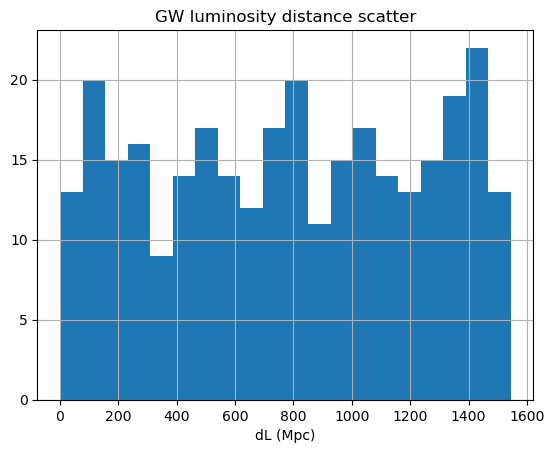

In [ ]:
plt.hist(events, bins=20)
plt.xlabel('dL (Mpc)')
plt.title('GW luminosity distance scatter')
plt.grid()
plt.show()

In [ ]:

mr_inference = DrawnGWMergerRatePriorInference(H0_min, H0_max, theta_min, theta_max, fiducial_H0=fiducial_H0)
initial = fiducial + np.random.randn(32, len(fiducial))
nwalkers, ndim = initial.shape

sampler = EnsembleSampler(nwalkers, ndim, mr_inference.log_posterior, args=[events, z])
sampler.run_mcmc(initial, 30, progress=True)

  0%|          | 0/30 [00:00<?, ?it/s]/Users/bernardoveronese/phd/standard-sirens/.conda/lib/python3.10/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 30/30 [26:27<00:00, 52.91s/it]


State([[7.45696927e+01 1.23141665e-01 2.45134176e+00 9.06325127e+00]
 [6.77152945e+01 2.31373489e+00 6.91451049e+00 2.65826943e-01]
 [7.13924197e+01 2.59902117e-01 4.69125809e+00 7.66716746e-01]
 [7.58204300e+01 9.09649621e-02 8.31781493e-01 6.72820342e+00]
 [7.05451666e+01 1.85256310e+00 8.25443068e+00 4.88950855e-01]
 [7.42076117e+01 1.53615263e-02 5.13480216e+00 8.30919733e+00]
 [7.23800839e+01 2.00179701e+00 6.22138954e+00 2.15513691e-01]
 [6.43806735e+01 1.74584709e+00 5.39204331e+00 8.85981126e-01]
 [6.82033602e+01 1.32070653e+00 5.13680648e+00 6.35926575e-01]
 [6.78997805e+01 3.24931140e+00 9.57830905e+00 2.24244155e-01]
 [6.96072430e+01 1.78160989e+00 6.10648952e+00 4.20864865e-01]
 [7.11876997e+01 2.27707524e-01 9.06494702e+00 2.68759553e+00]
 [6.56077621e+01 3.63587494e-01 4.99100374e+00 9.64043016e+00]
 [7.29130621e+01 1.04005153e+00 5.18618517e+00 8.80374679e-01]
 [7.50911655e+01 1.64048469e+00 5.26094779e+00 7.83069603e-01]
 [6.76565353e+01 4.50167763e-01 1.69658226e+00 8.

In [ ]:
thin = round(np.max(sampler.get_autocorr_time()) / 2)
samples = sampler.get_chain(discard=10, thin=2, flat=True)
fig = corner(samples, labels=[r'$H_0$', r'$\alpha$', r'$\beta$', r'$c$'], truths=fiducial)

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 4 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 1;
tau: [2.87534328 3.11420504 3.2793254  3.29781277]